# THE SPARKS FOUNDATION_INTERNSHIP
(Data Science and Business Analytics)

## Task-3

### Perform Exploratory Data Analysis On Dataset "SuperStore
 As a business Manager try to find out the the weak areas where you can work to make more profit

## AUTHOR - M.Aizaz Ud Din

###### Importing all libraries required in this notebook

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sa
import matplotlib.pyplot as plt

###### Read dataset

In [2]:
data = pd.read_csv("D:\Artifical Intelligent\Dataset\SampleSuperstore.csv")

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
data.shape #check row and Columns

(9994, 13)

##### column name

In [7]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

##### now checking how many values in each columns

In [8]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

##### If you want to check in one columns

In [9]:
data["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [10]:
data["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

##### Checking Any Missing Value

In [11]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

##### droping unnecessary columns such as Country,postal code,quantity because it does affect in profit

In [12]:
new_data=data.drop(["Country","Postal Code","Quantity"],axis=1)

#### Heat map of dataset

In [13]:
r=new_data.corr()

<AxesSubplot:>

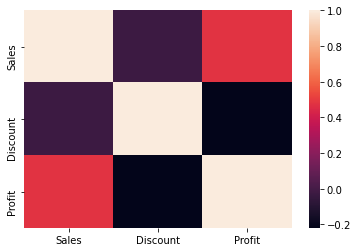

In [14]:
sa.heatmap(r,xticklabels=r.columns,yticklabels=r.columns)

In [28]:
ship_mode=data["Ship Mode"]
Segment=data["Segment"]
State=data["State"]
ship_mode=data["Ship Mode"]
Region=data["Region"]
Category= data["Category"]
Sub_Category= data["Sub-Category"]
Sales= data["Sales"]
Category= data["Category"]
City= data["City"]
Discount = data["Discount"]
Profit = data["Profit"]

#### Checking Relationsip with profit 

<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

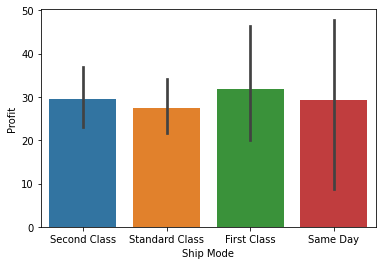

In [16]:
sa.barplot(y=Profit, x=ship_mode)


<AxesSubplot:xlabel='Segment', ylabel='Profit'>

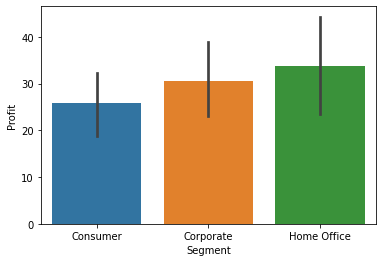

In [17]:
sa.barplot(y=Profit, x=Segment )

<AxesSubplot:xlabel='City', ylabel='Profit'>

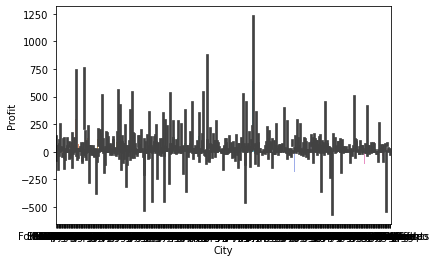

In [39]:
sa.barplot(y=Profit, x=City )

<AxesSubplot:xlabel='Region', ylabel='Profit'>

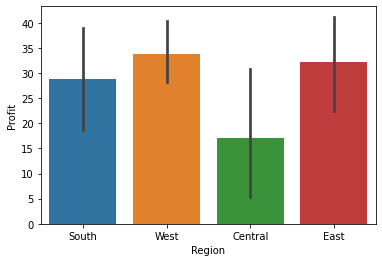

In [18]:
sa.barplot(y=Profit, x=Region  )

<AxesSubplot:xlabel='Category', ylabel='Profit'>

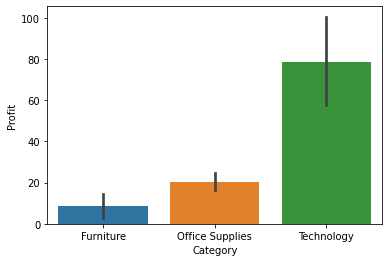

In [19]:
sa.barplot(y=Profit, x=Category)

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

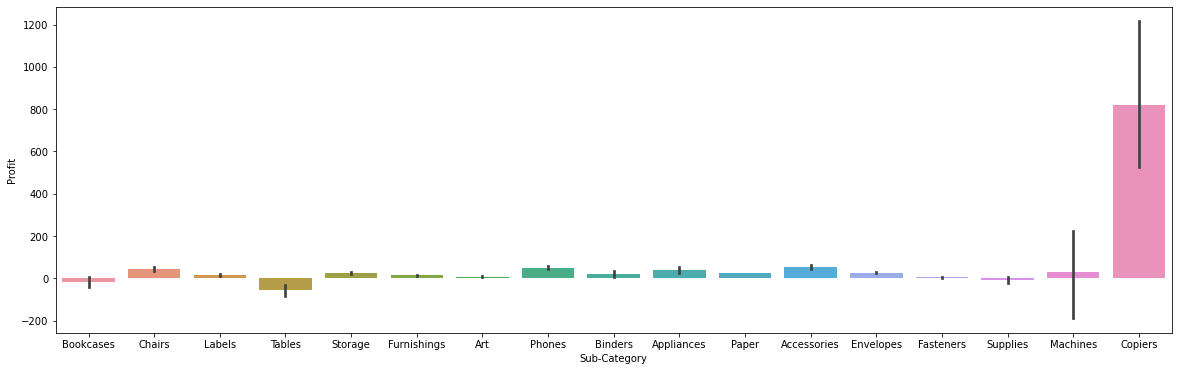

In [20]:
plt.figure(figsize= (20,6))
sa.barplot(y=Profit, x=Sub_Category )


<function matplotlib.pyplot.show(close=None, block=None)>

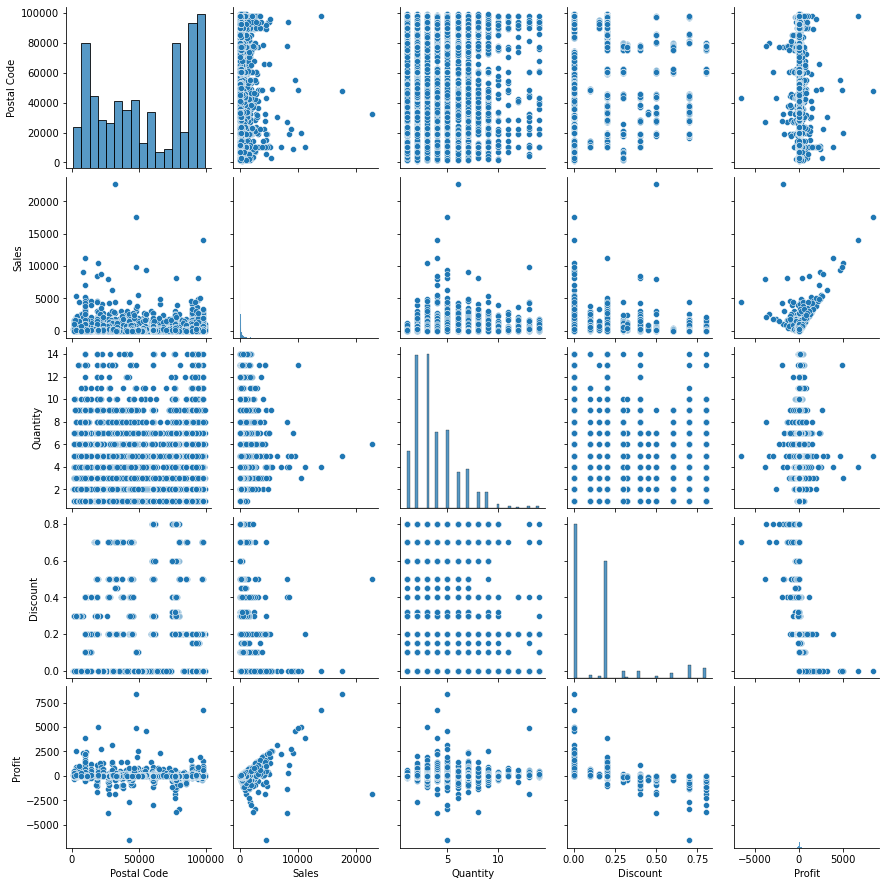

In [40]:
sa.pairplot(data)
plt.show

<ipython-input-21-c1ef2f740994>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby("Category")["Profit","Sales"].agg(["sum"]).plot.bar()


<AxesSubplot:xlabel='Category'>

<Figure size 504x504 with 0 Axes>

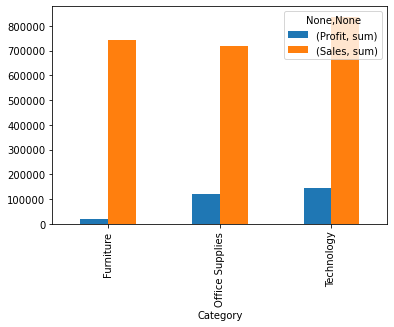

In [21]:
plt.figure(figsize=(7,7))
data.groupby("Category")["Profit","Sales"].agg(["sum"]).plot.bar()

### Computing Catrgory in term of sales and profit

<AxesSubplot:xlabel='Category'>

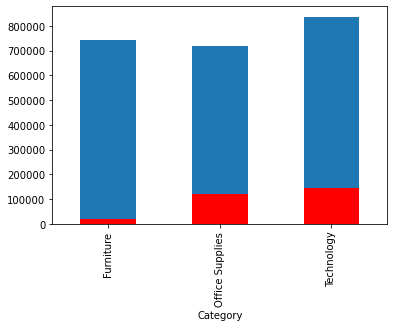

In [22]:
sal=data.groupby("Category").Sales.sum()
pro=data.groupby("Category").Profit.sum()
sal.plot(kind="bar")
pro.plot(kind="bar",color="red")


Computing Sub-Catrgory in term of sales and profit

<AxesSubplot:xlabel='Sub-Category'>

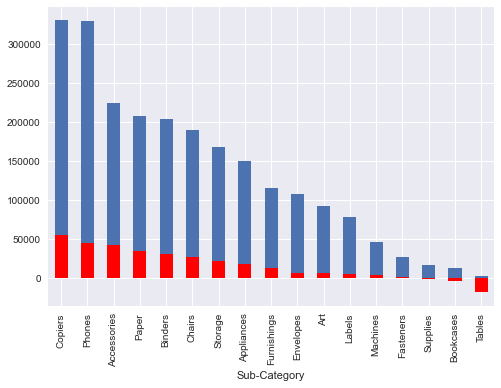

In [24]:
sale=data.groupby("Sub-Category").Sales.sum().nlargest(n=100)
prof=data.groupby("Sub-Category").Profit.sum().nlargest(n=100)
plt.style.use("seaborn")
sale.plot(kind="bar")
prof.plot(kind="bar",color="red")

##### detial view by using Barh graph

<AxesSubplot:ylabel='Sub-Category'>

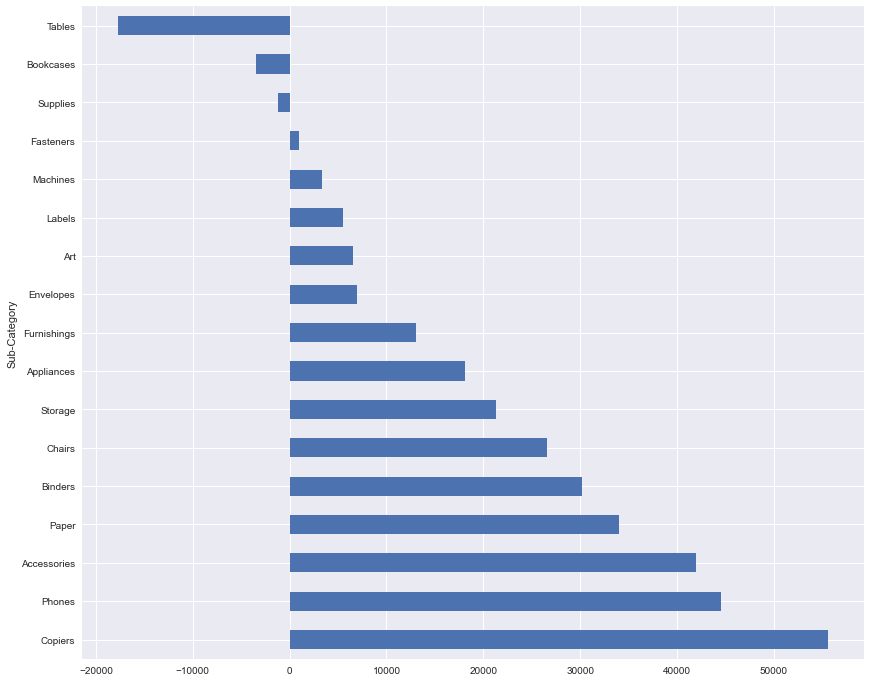

In [27]:
plt.figure(figsize=(14,12))
state_view= data.groupby(["Sub-Category"])["Profit"].sum().nlargest(50)
state_view.plot.barh()

Above graph clearly shows that copier and phones have the highest sales and profit
Table,bookcases has negative profit

<AxesSubplot:ylabel='Sub-Category'>

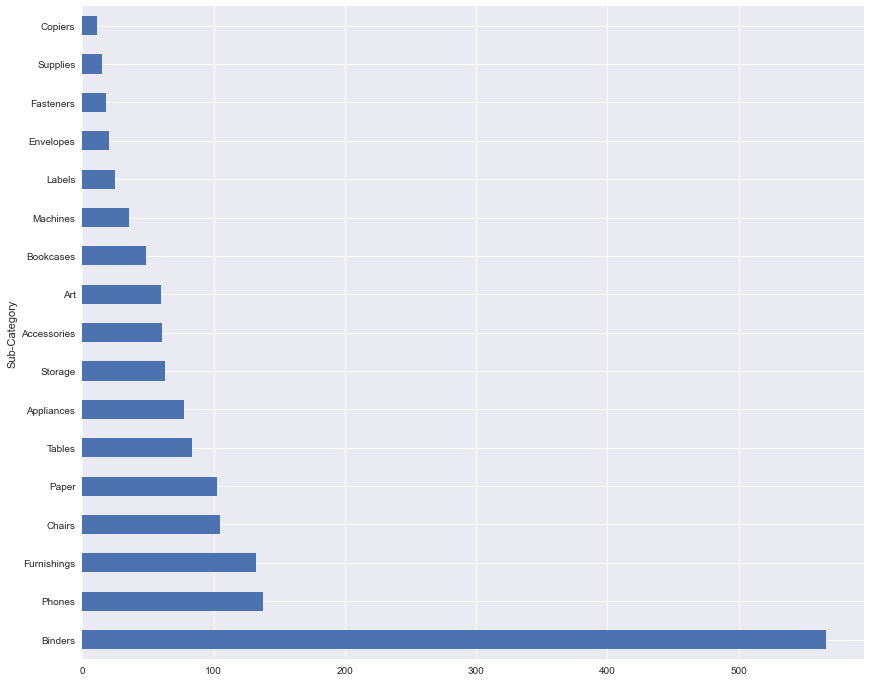

In [30]:
plt.figure(figsize=(14,12))
state_view= data.groupby(["Sub-Category"])["Discount"].sum().nlargest(50)
state_view.plot.barh()

in above graph its clearly see that if we less in the Discount in table and bookcase then it will give Profit

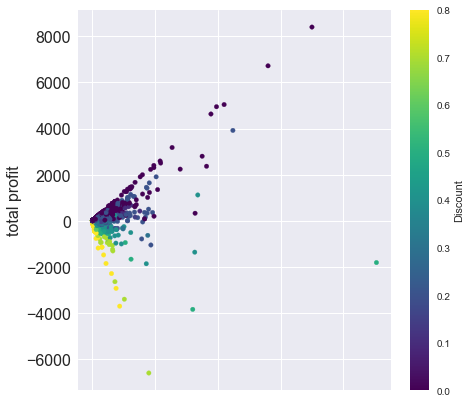

In [33]:
plt.style.use("seaborn")
data.plot(kind ="scatter",figsize=(7,7),x="Sales",y="Profit",c="Discount",s=20,fontsize=16,colormap="viridis")
plt.ylabel("total profit",fontsize=16)
plt.show()

the graph clearly shows that if we give more Discount on our products Sales increase but profit decrease

## Conclusion

The weak Area where can work hard to make more profit
- we should work on Central region because its give less profit
- we should limit sales of Furniture and increase the sale of technology and officer supplier because its give more profit
- sales of Table and Bookcase should be Minized because it not give profit
- No Discount offer on Table and Bookcase so that its give as profit
- More sales for Phones and copier so its give more profit